In [204]:
import numpy as np
import pandas as pd
import plasmid as pge
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
x = pge.fileIO.read_fastx('pseudo_ref.fq.bz2')
ref = pge.fileIO.read_fasta('../data/ref_db.fa')
ref = ref[ref['name'].str.contains('HAP')]

In [206]:
def getacc(qry, ref):
    aln = pge.Aligner()
    df = aln.minimap2(query=qry, database=ref)
    df = pge.Aligner.filter_idx(df, ['query_id','database_id'], 'AS', 'idxmax')
    df = df.rename(columns={'query_id':'name'})
    qry = qry.merge(df[['name','database_id','match_score','similarity']], how='left', on='name')
    return qry

In [207]:
x['length'] = [len(i) for i in x.sequence]
df = getacc(x, ref)

[M::mm_idx_gen::0.002*1.45] collected minimizers
[M::mm_idx_gen::0.003*1.98] sorted minimizers
[M::main::0.003*1.98] loaded/built the index for 50 target sequence(s)
[M::mm_mapopt_update::0.003*1.87] mid_occ = 15
[M::mm_idx_stat] kmer size: 15; skip: 4; is_hpc: 0; #seq: 50
[M::mm_idx_stat::0.003*1.80] distinct minimizers: 10565 (87.01% are singletons); average occurrences: 1.227; average spacing: 2.530; total length: 32786
[M::worker_pipeline::0.065*2.63] mapped 5601 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -D --dual=no --for-only -c -k 15 -w 4 -o /tmp/aligner_wg1u46_s/results.paf /tmp/aligner_wg1u46_s/database.fa /tmp/aligner_wg1u46_s/read1.fq
[M::main] Real time: 0.065 sec; CPU: 0.171 sec; Peak RSS: 0.505 GB


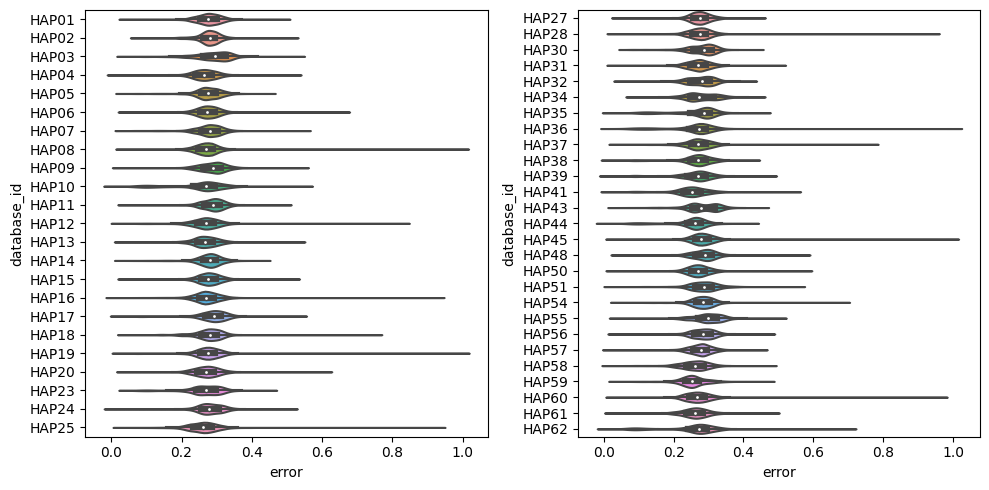

In [48]:
df = df.dropna()
df['error'] = 1-df['similarity']
df = df.sort_values(by=['database_id'])
df['h'] = [int(i.split('HAP')[-1]) for i in df.database_id]
c = df['h'] > 25

plt.figure(1, figsize=(10,5))
plt.subplot(1,2,1)
sns.violinplot(data=df[~c], x='error', y='database_id')
plt.subplot(1,2,2)
sns.violinplot(data=df[c], x='error', y='database_id')
plt.tight_layout()
plt.savefig('error.png')
plt.show()

In [3]:
aln = pge.Aligner()
clst = pge.Clust()
df = clst.get_distance_matrix(ref, ref)

[M::mm_idx_gen::0.002*1.29] collected minimizers
[M::mm_idx_gen::0.003*1.85] sorted minimizers
[M::main::0.003*1.85] loaded/built the index for 50 target sequence(s)
[M::mm_mapopt_update::0.004*1.81] mid_occ = 88
[M::mm_idx_stat] kmer size: 7; skip: 1; is_hpc: 0; #seq: 50
[M::mm_idx_stat::0.004*1.78] distinct minimizers: 5565 (26.92% are singletons); average occurrences: 5.830; average spacing: 1.011; total length: 32786
[M::worker_pipeline::0.209*2.88] mapped 50 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -x map-ont -P -c -k 7 -w 1 -o /tmp/clust_cw_6zd1q/results.paf /tmp/clust_cw_6zd1q/database.fa /tmp/clust_cw_6zd1q/read1.fa
[M::main] Real time: 0.210 sec; CPU: 0.604 sec; Peak RSS: 0.236 GB


Converting paired list to adjacency matrix


<Figure size 500x300 with 0 Axes>

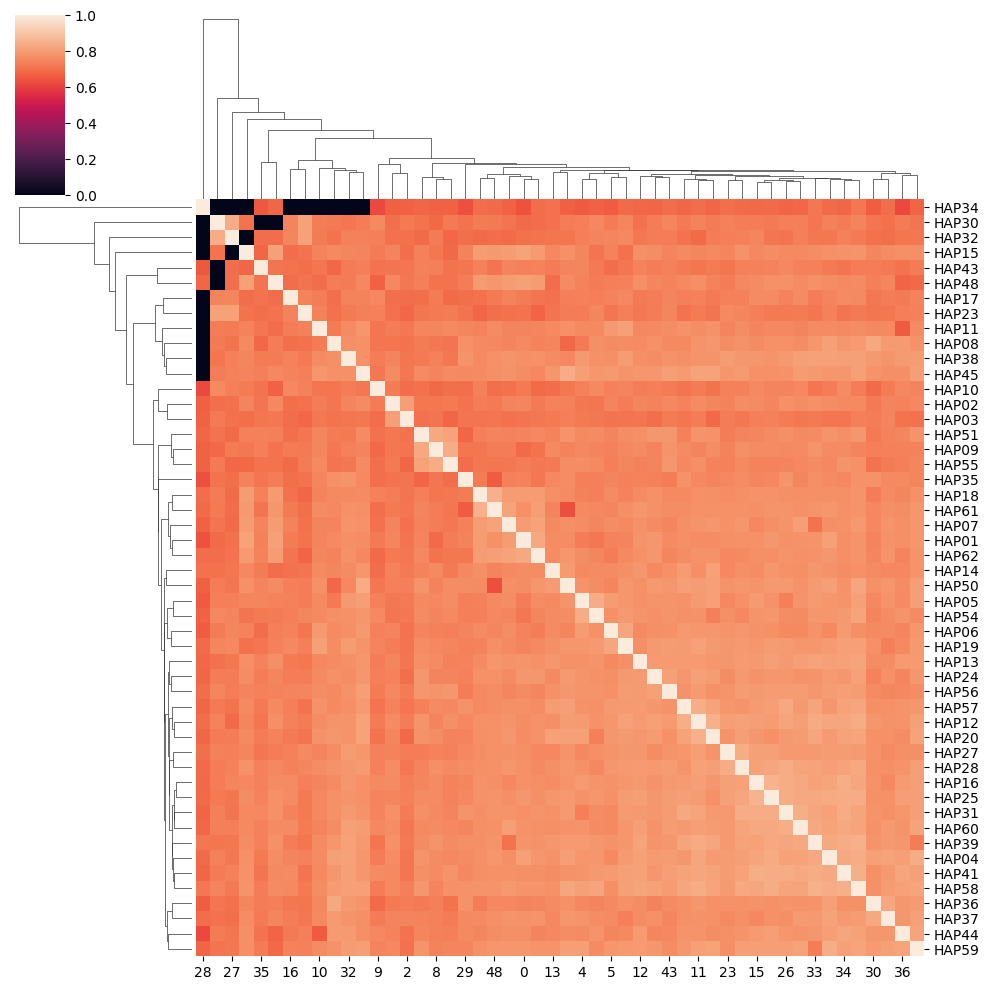

In [8]:
plt.figure(1, figsize=(5,3))
# display only first 30 columns
ylabel = df['columns']
sns.clustermap(data=1-df['matrix'], yticklabels=ylabel)
plt.savefig('dendrogram.png')
plt.show()


In [52]:
aln = pge.Aligner()
df = aln.minimap2(query=ref, database=ref)

[M::mm_idx_gen::0.002*1.28] collected minimizers
[M::mm_idx_gen::0.003*1.87] sorted minimizers
[M::main::0.003*1.87] loaded/built the index for 50 target sequence(s)
[M::mm_mapopt_update::0.004*1.83] mid_occ = 88
[M::mm_idx_stat] kmer size: 7; skip: 1; is_hpc: 0; #seq: 50
[M::mm_idx_stat::0.004*1.80] distinct minimizers: 5565 (26.92% are singletons); average occurrences: 5.830; average spacing: 1.011; total length: 32786
[M::worker_pipeline::0.209*2.90] mapped 50 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -x map-ont -P -c -k 7 -w 1 -o /tmp/aligner_u4fbtyq7/results.paf /tmp/aligner_u4fbtyq7/database.fa /tmp/aligner_u4fbtyq7/read1.fa
[M::main] Real time: 0.210 sec; CPU: 0.607 sec; Peak RSS: 0.817 GB


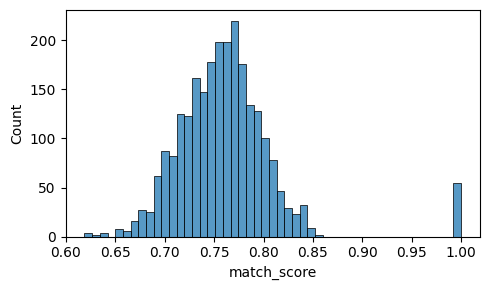

In [58]:
plt.figure(1, figsize=(5,3))
sns.histplot(data=df, x='match_score')
plt.savefig('histogram.jpg')
plt.tight_layout()
plt.show()

In [5]:
clst = pge.Clust()
clst.params['minimap']['k'] = 15
clst.params['minimap']['w'] = 4
df = clst.optics_sequence(x)

cluster_compute: computing pairwise distance matrix


[M::mm_idx_gen::0.263*0.89] collected minimizers
[M::mm_idx_gen::0.485*0.96] sorted minimizers
[M::main::0.485*0.96] loaded/built the index for 2298 target sequence(s)
[M::mm_mapopt_update::0.498*0.96] mid_occ = 468
[M::mm_idx_stat] kmer size: 15; skip: 4; is_hpc: 0; #seq: 2298
[M::mm_idx_stat::0.508*0.96] distinct minimizers: 638335 (79.37% are singletons); average occurrences: 3.009; average spacing: 2.457; total length: 4719516
[M::worker_pipeline::23.703*2.87] mapped 2298 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -D --dual=no --for-only -c -k 15 -w 4 -o /tmp/clust_51eee6s1/results.paf /tmp/clust_51eee6s1/database.fq /tmp/clust_51eee6s1/read1.fq
[M::main] Real time: 23.714 sec; CPU: 68.124 sec; Peak RSS: 0.242 GB


Converting paired list to adjacency matrix
Running clust_OPTICS
max_eps = 0.5
clust_OPTICS: iter=0 using min_samples=1149


/home/zchen/Public/python/lib/python3.11/site-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
/home/zchen/Public/python/lib/python3.11/site-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(


clust_OPTICS: clusters=0 outliers=2298 delta=574.5
clust_OPTICS: iter=1 using min_samples=575
clust_OPTICS: clusters=0 outliers=2298 delta=574
clust_OPTICS: iter=2 using min_samples=288


/home/zchen/Public/python/lib/python3.11/site-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
/home/zchen/Public/python/lib/python3.11/site-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(


clust_OPTICS: clusters=0 outliers=2298 delta=287
clust_OPTICS: iter=3 using min_samples=145
clust_OPTICS: clusters=0 outliers=2298 delta=143
clust_OPTICS: iter=4 using min_samples=74
clust_OPTICS: clusters=6 outliers=1941 delta=71
clust_OPTICS: iter=5 using min_samples=39
clust_OPTICS: clusters=7 outliers=786 delta=35
clust_OPTICS: iter=6 using min_samples=22
clust_OPTICS: clusters=3 outliers=402 delta=17
clust_OPTICS: iter=7 using min_samples=47
clust_OPTICS: clusters=12 outliers=1052 delta=8
clust_OPTICS: iter=8 using min_samples=59
clust_OPTICS: clusters=10 outliers=1764 delta=-12
clust_OPTICS: iter=9 using min_samples=41
clust_OPTICS: clusters=10 outliers=810 delta=-6
clust_OPTICS: iter=10 using min_samples=32
clust_OPTICS: clusters=4 outliers=551 delta=9
clust_OPTICS: iter=11 using min_samples=45
clust_OPTICS: clusters=10 outliers=956 delta=4
clust_OPTICS: iter=12 using min_samples=51
clust_OPTICS: clusters=14 outliers=1332 delta=-6
clust_OPTICS: iter=13 using min_samples=54
clust

In [12]:
# get accuracy
aln = pge.Aligner()
acc = aln.minimap2(query=x, database=ref)
acc = pge.Aligner.filter_idx(acc, ['query_id','database_id'],'match_score','idxmax')

[M::mm_idx_gen::0.013*0.29] collected minimizers
[M::mm_idx_gen::0.017*0.46] sorted minimizers
[M::main::0.017*0.46] loaded/built the index for 50 target sequence(s)
[M::mm_mapopt_update::0.018*0.48] mid_occ = 15
[M::mm_idx_stat] kmer size: 15; skip: 4; is_hpc: 0; #seq: 50
[M::mm_idx_stat::0.018*0.50] distinct minimizers: 10565 (87.01% are singletons); average occurrences: 1.227; average spacing: 2.530; total length: 32786
[M::worker_pipeline::0.748*2.40] mapped 2298 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -D --dual=no --for-only -c -k 15 -w 4 -o /tmp/aligner_dl5xvr6t/results.paf /tmp/aligner_dl5xvr6t/database.fa /tmp/aligner_dl5xvr6t/read1.fq
[M::main] Real time: 0.750 sec; CPU: 1.795 sec; Peak RSS: 0.431 GB


<Axes: xlabel='ordering', ylabel='acc'>

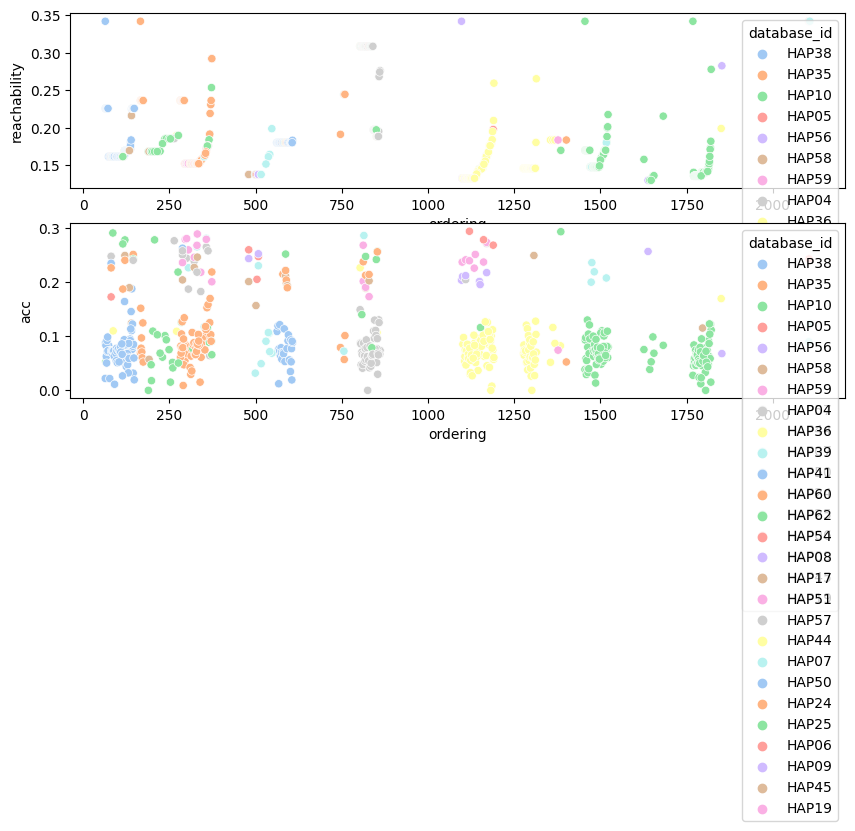

In [29]:
acc = acc.rename(columns={'query_id':'name'})
df2 = df.merge(acc[['name','match_score','database_id']], how='left', on='name')
df2['acc'] = 1-df2['match_score']
c = df2['labels']!=-1

plt.figure(1,figsize=(10,5))
plt.subplot(2,1,1)
sns.scatterplot(data=df2[c], x='ordering',y='reachability', hue='database_id', palette='pastel')
plt.subplot(2,1,2)
sns.scatterplot(data=df2[c], x='ordering',y='acc', hue='database_id', palette='pastel')


In [1]:
aln = pge.Aligner()
aln.params['spoa']['algorithm'] = 2
z = pd.read_csv('../notebooks/.csv')

c = z['labels'] == 9
zz = aln.spoa(z[c].sequence.values)
out = pge.Aligner.colorize_msa(zz['msa'])
print(out)
print('consensus')
print(zz['consensus'])

NameError: name 'pge' is not defined